# Shared Bikes Demand Prediction - Assignment Solution

### Problem Statement:

A US bike-sharing provider `BoomBikes` has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —


- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands

### Data Understanding :

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

**Solution is divided into following steps:**
1. Reading and Understanding the Data
2. Data Cleaning
3. Visualization
4. Data preperation for regression analysis
5. Model Building
6. Residual Analysis
7. Prediction and Model Evaluation
8. Conclusion

# Step1 : Reading and Understanding the Data

In [1]:
# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [4]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
# reading data
data=pd.read_csv(r"C:\Users\Abvikas\Desktop\Gouri\Main Program\ML\case study\day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# shape
data.shape

(730, 16)

In [7]:
# numerical summery
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# checking for null values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Findings :
  1. Null values are not present in any columns.
  2. categorical variables are present with int data types.
  3. other than that all others are in numerical in nature.

# Step 2:  Data Cleaning

Assumptions:
1. As index type variable is instant so we will drop it
2. dteday variable is having data of dates wich is present in year, month and weekdays so we will drop it.
3. Categorical variables present in int format , we will convert them in categorical string format.

### Dropping columns

In [10]:
# dropping instnat column as it gives index
data=data.drop('instant', axis=1)

In [11]:
# dropping dteday column as we its information in year and weekday column
data=data.drop('dteday',axis=1)

In [12]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Creating categories of categorical variables -
converting categorical numerical format to string

In [13]:
# season column
data.season=data.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})


In [14]:
# month column
data.mnth=data.mnth.replace({1:'jan', 2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


In [15]:
# weathersit column
data.weathersit= data.weathersit.replace({1:'clear',2:'cloudy',3:'light_rain',4:'heavy rain'})


In [16]:
# Weekday column
data.weekday = data.weekday.replace({1:'mon', 2:'tue', 3:'wed' , 4:'thu' , 5:'fri', 6:'sat' , 0:'sun'})


In [17]:
# holiday column
data.holiday=data.holiday.replace({1:'holiday', 0: 'no holiday'})

In [18]:
# yr column
data.yr=data.yr.replace({1:'2019', 0: '2018'})


In [19]:
# workingday column
data.workingday=data.workingday.replace({1:'workingday', 0: 'holiday'})


In [20]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,jan,no holiday,mon,workingday,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,jan,no holiday,tue,workingday,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,jan,no holiday,wed,workingday,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,jan,no holiday,thu,workingday,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,jan,no holiday,fri,workingday,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Step 3: Visualization

### Numerical variables

In [21]:
# creating subcategory for numerical variables

num_var=data.select_dtypes(exclude=['object'])

# checking datatypes of subcategory
num_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   atemp       730 non-null    float64
 2   hum         730 non-null    float64
 3   windspeed   730 non-null    float64
 4   casual      730 non-null    int64  
 5   registered  730 non-null    int64  
 6   cnt         730 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 40.1 KB


In [22]:
# creating list of numerical variables
num_var_list1=list(num_var.columns)
num_var_list1

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

### Checking distributions of numerical variables

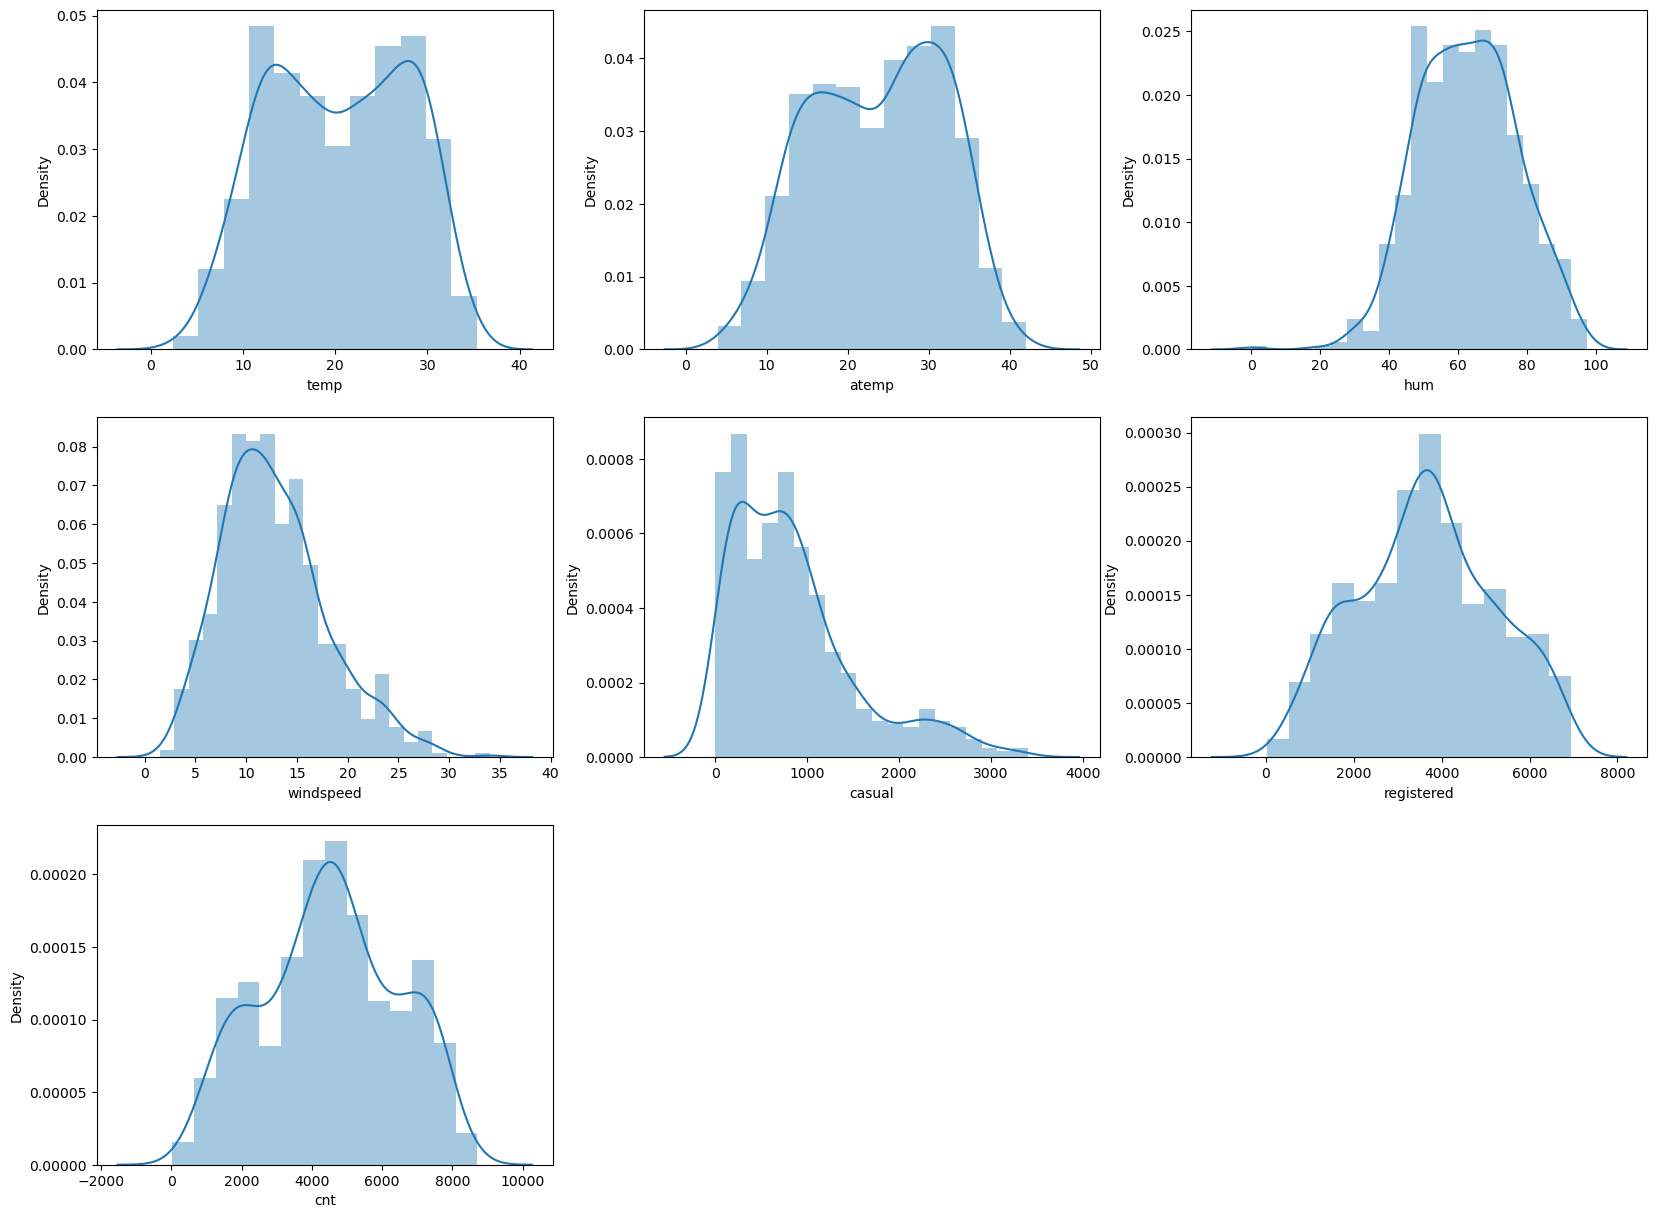

In [23]:
#plotting distplot to check distribution of numerical variables

i=1
plt.figure(figsize=(20,15))
for var in num_var_list1:
    plt.subplot(3,3,i)
    sns.distplot(x=data[var])
    plt.xlabel(var) 
    i=i+1

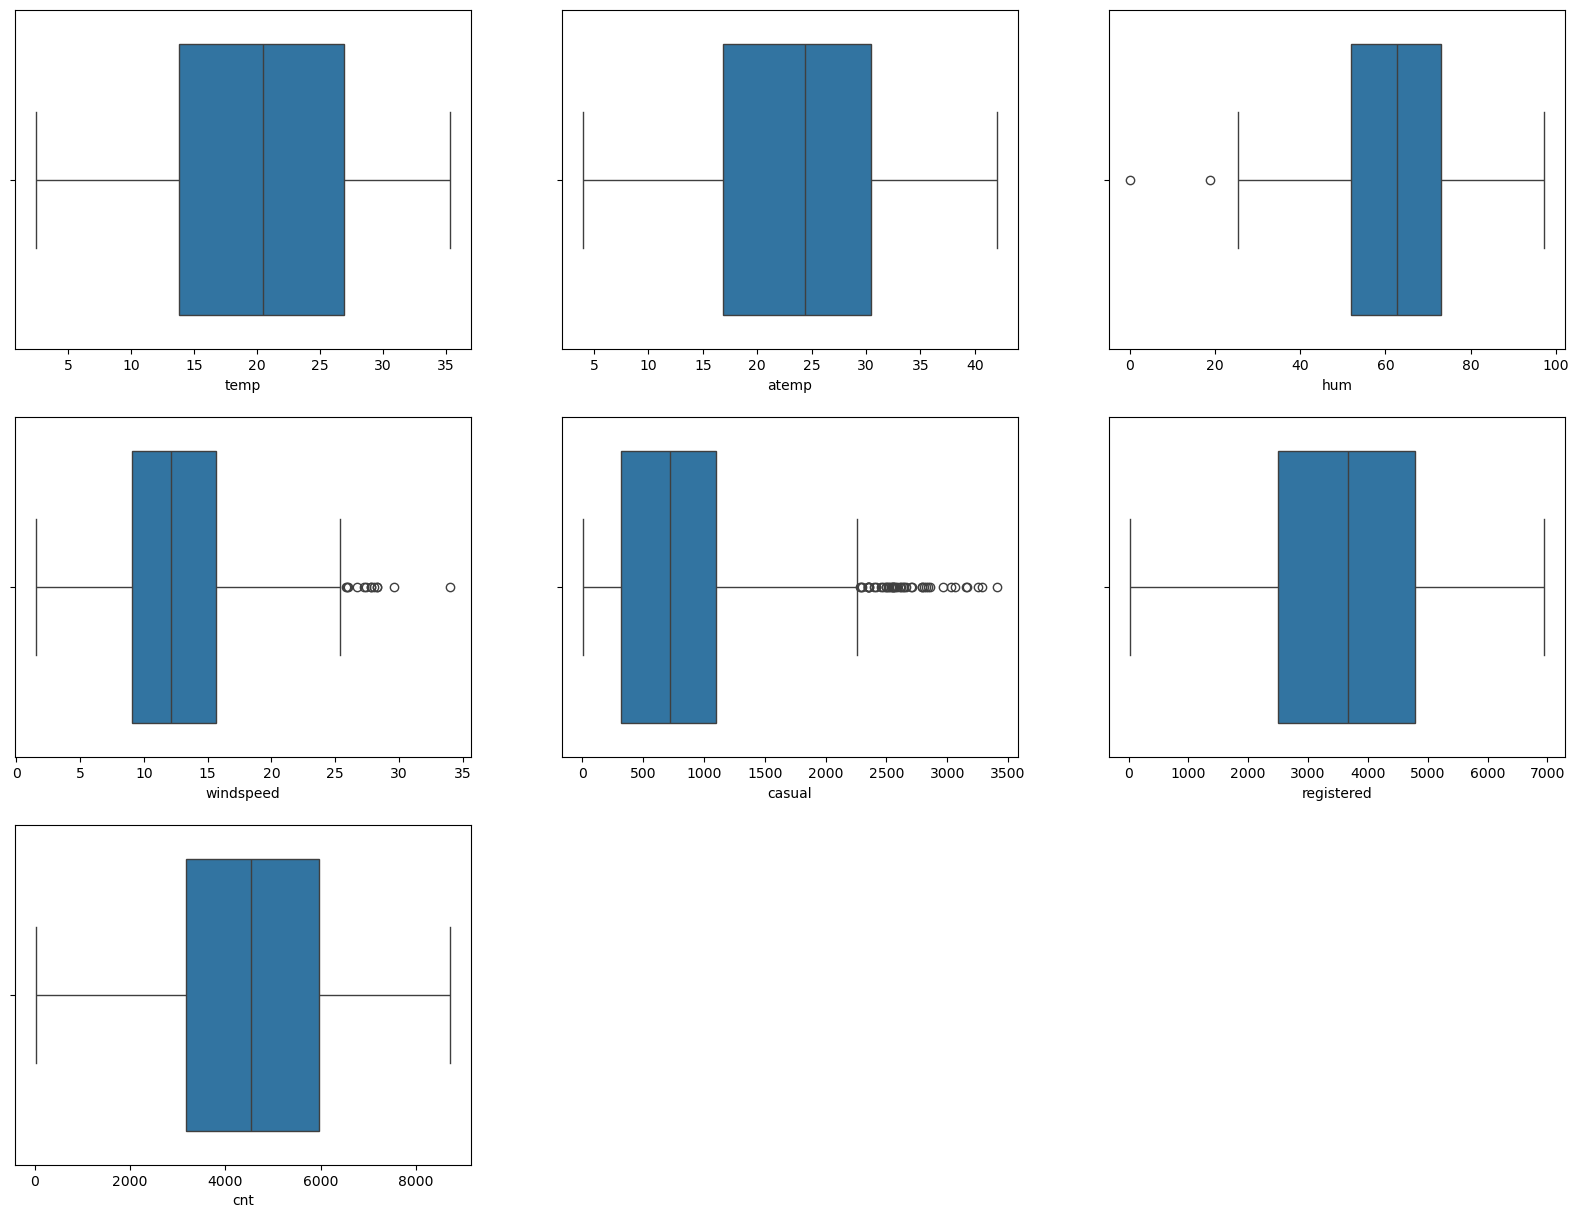

In [24]:
# checking boxplot for outliers of numerical variables

i=1
plt.figure(figsize=(20,15))
for var in num_var_list1:
    plt.subplot(3,3,i)
    sns.boxplot(x=data[var])
    i=i+1
    

**Observations:** 

 - As we can see outliers are present in causal.
 - Here 'cnt' is combination of 'casual' and 'resistered' so we will drop both casual and registered.
 - All others have no outliers.

In [25]:
# dropping casual and registered columns as their sum present in 'cnt'
data= data.drop(['registered','casual'], axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,no holiday,mon,workingday,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,no holiday,tue,workingday,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,no holiday,wed,workingday,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,no holiday,thu,workingday,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,no holiday,fri,workingday,clear,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
# lets update the list of numerical variables as we have dropped 2 columns registered and casual
num_var_list1=['temp','atemp','hum','windspeed','cnt']

 lets check linear relation between numerical varibles using pairplot

<Figure size 1000x1200 with 0 Axes>

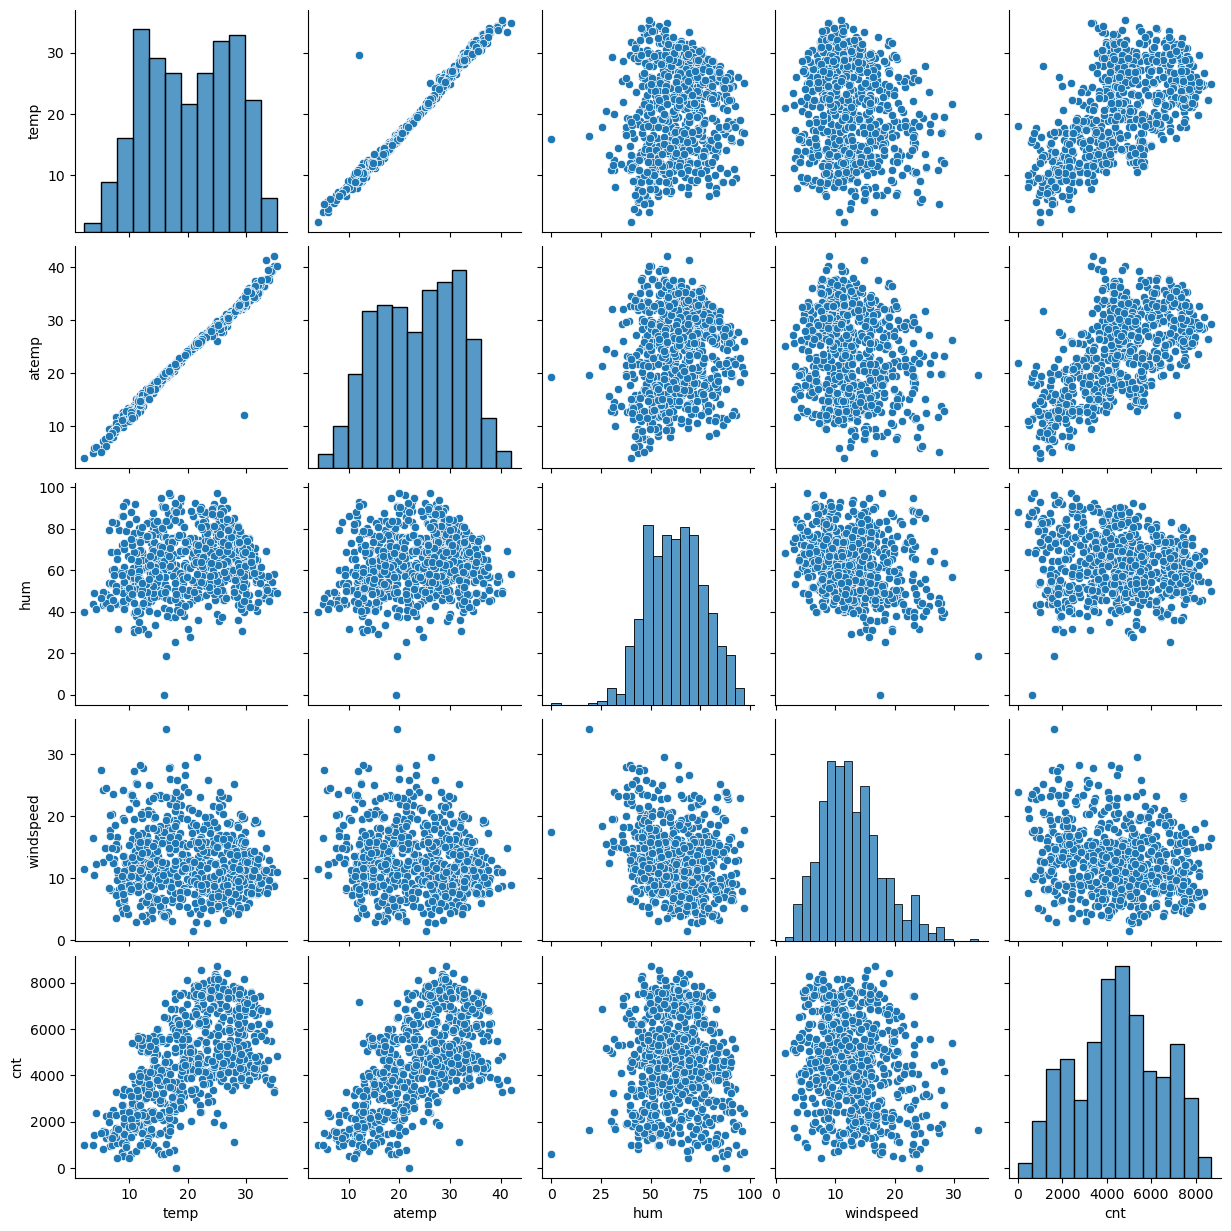

In [27]:
# pairplot for numerical variables

plt.figure(figsize=(10,12))
sns.pairplot(data=data,vars=num_var_list1)
plt.show()

#### Observations from pairplot
1. Linear relation between cnt and temp, and cnt and atemp.
2. Strong linear relation between temp and atemp and have high correlation between both of them so we will use one of them while building a model.

In [30]:
# Checking for heatmap for corelation of numerical variables

<Axes: >

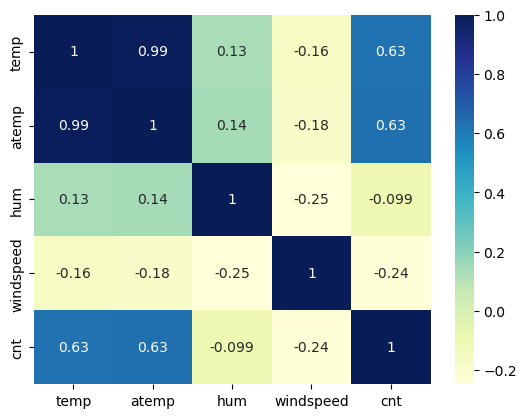

In [28]:
sns.heatmap( data[['temp','atemp','hum','windspeed','cnt']].corr(), annot= True, cmap= "YlGnBu")

**Observation:**

- We can see that atemp and temp is highly co-related with each other so we will drop one of them 
- Also notice that temp and atemp is positively corelated to cnt i.e. our target variable


In [29]:
# dropping atemp variable
data=data.drop('atemp', axis=1)

In [30]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,jan,no holiday,mon,workingday,cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,jan,no holiday,tue,workingday,cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,jan,no holiday,wed,workingday,clear,8.050924,43.7273,16.636703,1349
3,spring,2018,jan,no holiday,thu,workingday,clear,8.200000,59.0435,10.739832,1562
4,spring,2018,jan,no holiday,fri,workingday,clear,9.305237,43.6957,12.522300,1600


### Categorical variable

In [31]:
data.head(7)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,jan,no holiday,mon,workingday,cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,jan,no holiday,tue,workingday,cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,jan,no holiday,wed,workingday,clear,8.050924,43.7273,16.636703,1349
3,spring,2018,jan,no holiday,thu,workingday,clear,8.200000,59.0435,10.739832,1562
4,spring,2018,jan,no holiday,fri,workingday,clear,9.305237,43.6957,12.522300,1600
5,spring,2018,jan,no holiday,sat,holiday,clear,8.378268,51.8261,6.000868,1606
6,spring,2018,jan,no holiday,sun,holiday,cloudy,8.057402,49.8696,11.304642,1510


In [32]:
# creating subcategory for numerical variables

cat_var=data.select_dtypes(include=['object'])

# checking datatypes of subcategory
cat_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   yr          730 non-null    object
 2   mnth        730 non-null    object
 3   holiday     730 non-null    object
 4   weekday     730 non-null    object
 5   workingday  730 non-null    object
 6   weathersit  730 non-null    object
dtypes: object(7)
memory usage: 40.1+ KB


In [33]:
# creating list of categorical variables
cat_var_list1=list(cat_var.columns)
print(cat_var_list1)



['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


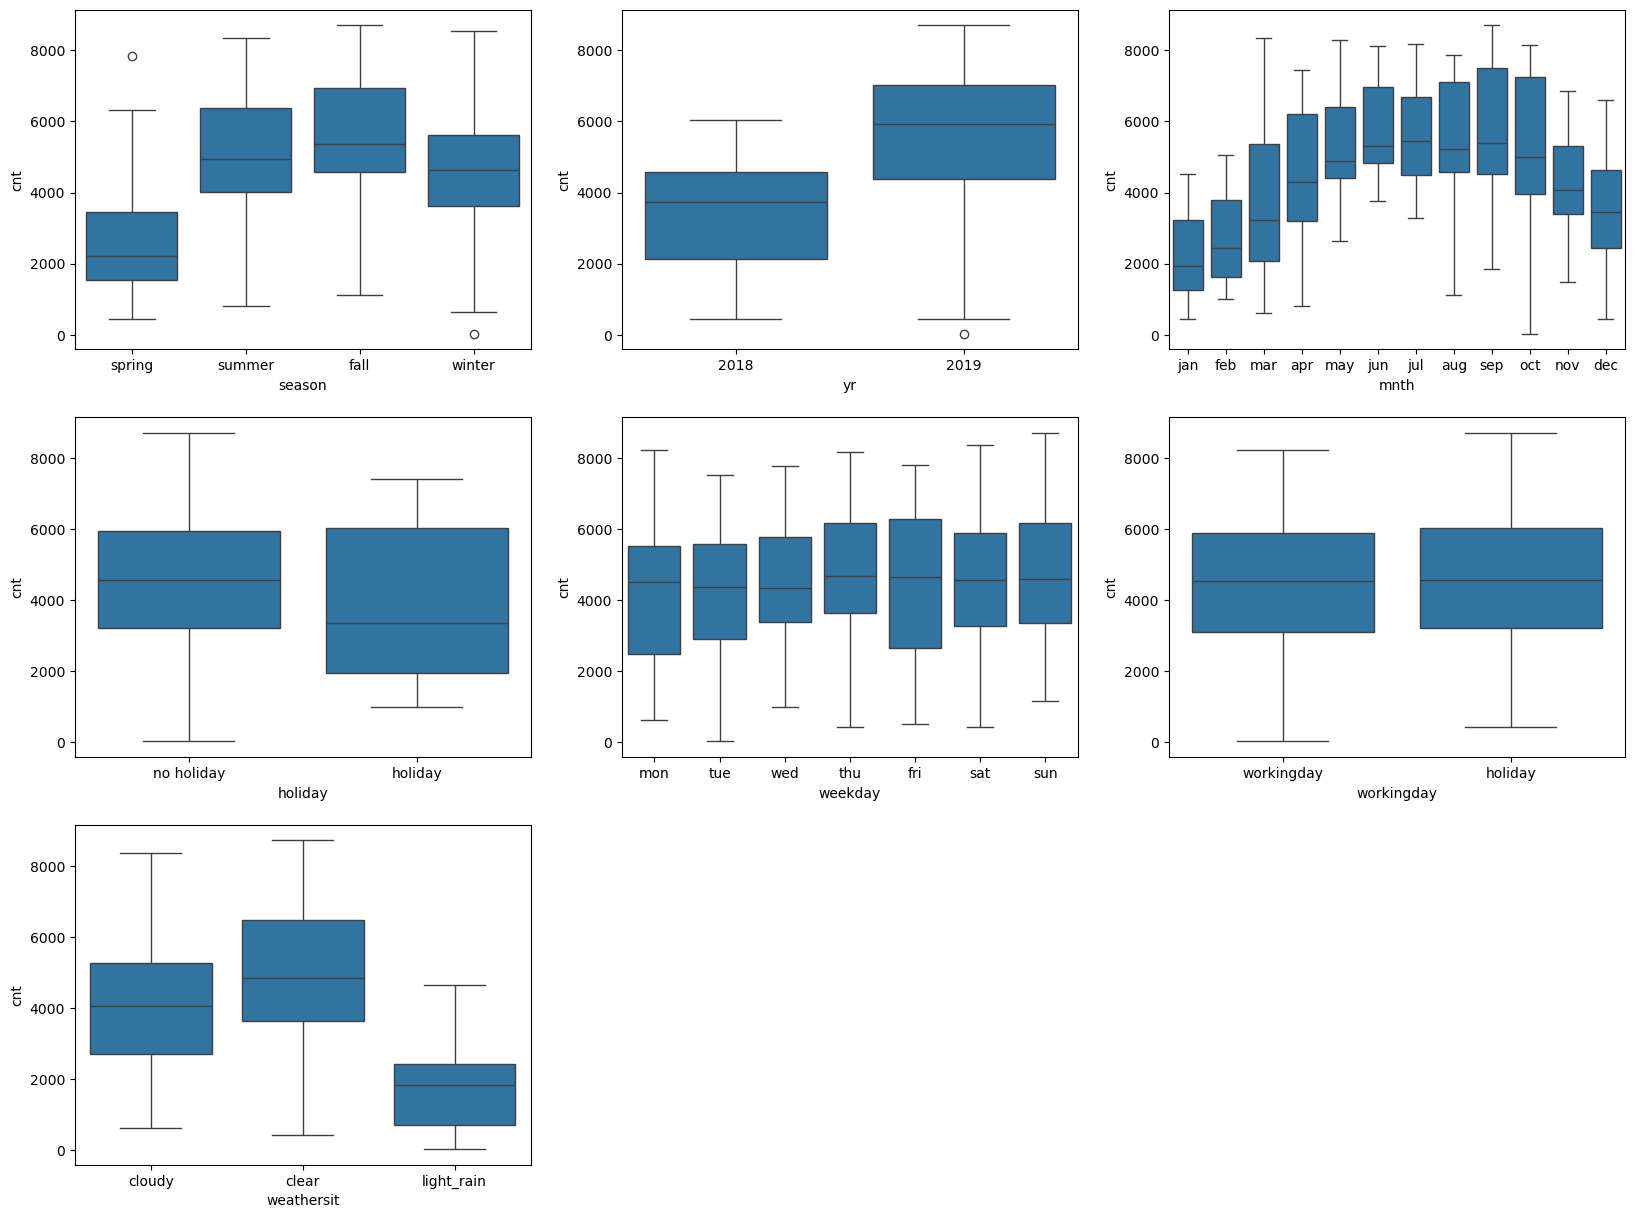

In [34]:
# plotting boxplot 
plt.figure(figsize=(20,15))
i=1
for col in cat_var_list1:
    plt.subplot(3,3,i)
    sns.boxplot(x=col , y= 'cnt', data=data)
    i=i+1

#### Observations:
1. Season vs cnt - Count of bike sharing requirements is high in fall season.
2. yr vs cnt - it founds increased count in 2019. 
3. month vs cnt - month of June have highest requirments.
4. weathersit vs cnt - requirements are maximum in clear weather. 
5. Weakday vs cnt - mostly friday has maximum enquiries. 
    

# Step 4: Data preperation for regression analysis

### Creating dummy variables for categorical variables

In [35]:
dummies=pd.get_dummies(data[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']],drop_first=True, dtype=int)
dummies

,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,...,holiday_no holiday,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_workingday,weathersit_cloudy,weathersit_light_rain
0,1,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,1,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
726,1,0,0,1,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
727,1,0,0,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
728,1,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0


In [36]:
# shape of dummies
dummies.shape

(730, 25)

In [37]:
# checking shape of data
data.shape

(730, 11)

In [38]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,jan,no holiday,mon,workingday,cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,jan,no holiday,tue,workingday,cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,jan,no holiday,wed,workingday,clear,8.050924,43.7273,16.636703,1349
3,spring,2018,jan,no holiday,thu,workingday,clear,8.200000,59.0435,10.739832,1562
4,spring,2018,jan,no holiday,fri,workingday,clear,9.305237,43.6957,12.522300,1600


In [39]:
# Add the results to the original housing dataframe
data=pd.concat([data,dummies], axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,holiday_no holiday,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_workingday,weathersit_cloudy,weathersit_light_rain
0,spring,2018,jan,no holiday,mon,workingday,cloudy,14.110847,80.5833,10.749882,...,1,1,0,0,0,0,0,1,1,0
1,spring,2018,jan,no holiday,tue,workingday,cloudy,14.902598,69.6087,16.652113,...,1,0,0,0,0,1,0,1,1,0
2,spring,2018,jan,no holiday,wed,workingday,clear,8.050924,43.7273,16.636703,...,1,0,0,0,0,0,1,1,0,0
3,spring,2018,jan,no holiday,thu,workingday,clear,8.200000,59.0435,10.739832,...,1,0,0,0,1,0,0,1,0,0
4,spring,2018,jan,no holiday,fri,workingday,clear,9.305237,43.6957,12.522300,...,1,0,0,0,0,0,0,1,0,0


In [40]:
# checking shape after concatination
data.shape

(730, 36)

In [41]:
# drop original categorical variables as we have added dummies to dataframe
data=data.drop(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'],axis=1)
data.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,...,holiday_no holiday,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_workingday,weathersit_cloudy,weathersit_light_rain
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [42]:
# checking size after dropping categorical variables
data.shape

(730, 29)

In [43]:
# making copy of dataset
df=data
df.shape


(730, 29)

### Splitting Data into Training and Testing Sets

In [44]:
# splitting dataset in train and test set
df_train, df_test = train_test_split(df,train_size =0.7,random_state=100)


In [45]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [46]:
# checking tain dataset
df_train.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,...,holiday_no holiday,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_workingday,weathersit_cloudy,weathersit_light_rain
576,29.246653,70.4167,11.083475,7216,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
426,16.980847,62.1250,10.792293,4066,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
728,10.489153,48.3333,23.500518,1796,1,0,0,1,0,1,...,1,1,0,0,0,0,0,1,0,0
482,15.443347,48.9583,8.708325,4220,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
111,13.803347,72.9583,14.707907,1683,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


### Scaling the variables
We will use min-max scaling as it takes care of outliers

In [47]:
# define variables to be scale which are not dummy variables 
var=['temp','hum','windspeed','cnt']

In [48]:
# Using min-max scaler
scaler=MinMaxScaler()

In [49]:
df_train[var]=scaler.fit_transform(df_train[var])

df_train.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,...,holiday_no holiday,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_workingday,weathersit_cloudy,weathersit_light_rain
576,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
426,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,1,...,1,1,0,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
111,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [50]:
# checking scaling is proper or not 
df_train.describe()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,...,holiday_no holiday,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_workingday,weathersit_cloudy,weathersit_light_rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,0.096078,0.084314,...,0.974510,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.711765,0.345098,0.029412
std,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,0.294988,0.278131,...,0.157763,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.453386,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All variables have minimum value is 0 and maximum value is 1 hence our scaling is done properly.

### Heatmap

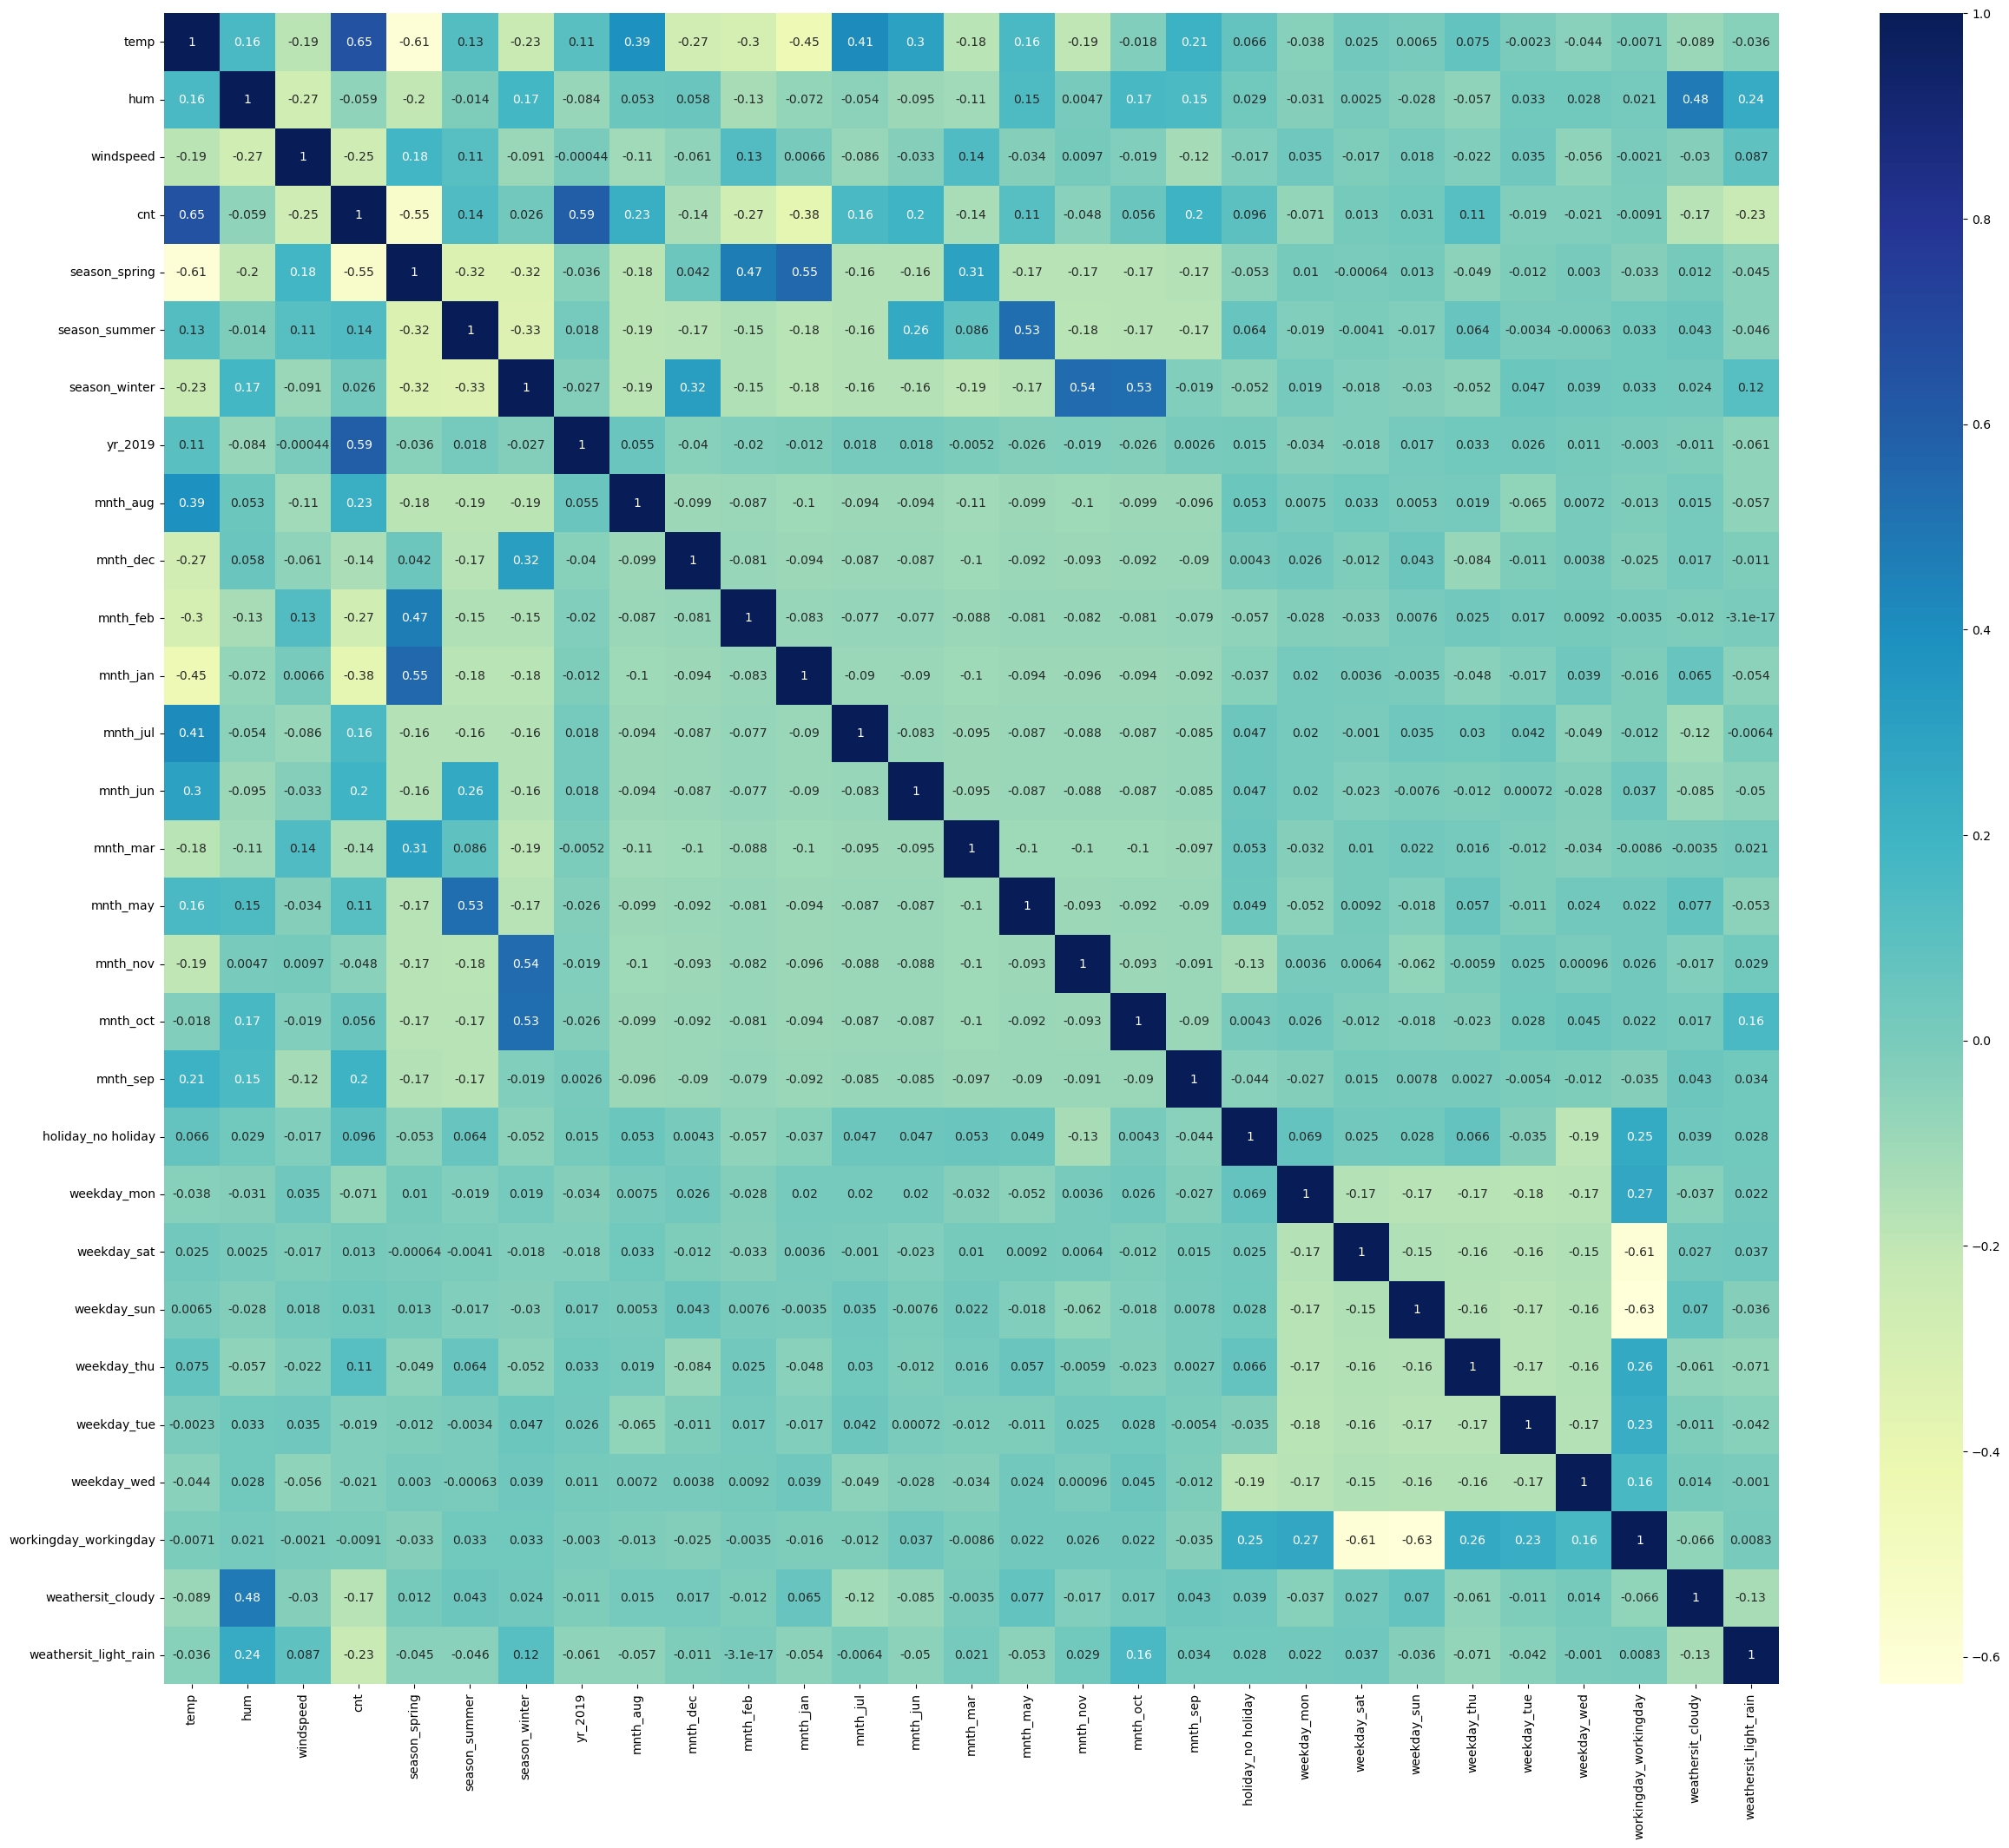

In [56]:
# Plotting heatmap to check correlation between variables
plt.figure(figsize=(30,25))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Dividing X train and Y train

In [51]:
y_train=df_train.pop('cnt')
X_train=df_train


In [52]:
#checking X_tain
X_train.head()


,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,...,holiday_no holiday,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_workingday,weathersit_cloudy,weathersit_light_rain
576,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
426,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,1,0,0,1,0,1,0,...,1,1,0,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
111,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [54]:
# checking Y train
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

# Step: 5  Model Building

We are going with reverse tracing with RFE and using statsmodel for building a model

### Defining function to calculate VIF

In [55]:
def Get_VIF(df):
    vif=pd.DataFrame()
    vif['features']=df.columns
    vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif= vif.sort_values(by='VIF', ascending= False)
    return vif

###  Defining function to build a model
 

In [57]:
def Build_model(X, y):
    X_train_sm=sm.add_constant(X)
    lr=sm.OLS(y, X_train_sm)
    lr_model=lr.fit()
    return lr_model.summary()

## Model 1


In [78]:
# building model 1 with all variables and also calculate VIF
Summary_model_1 =Build_model(X_train, y_train)
print(Summary_model_1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          1.34e-178
Time:                        17:39:02   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [79]:
# calculate VIF
print(Get_VIF(X_train))

                 features     VIF
18     holiday_no holiday  266.66
25  workingday_workingday  217.93
21            weekday_sun   41.94
20            weekday_sat   39.73
1                     hum   39.39
0                    temp   38.65
3           season_spring   12.50
5           season_winter   12.16
4           season_summer    8.16
16               mnth_oct    6.43
7                mnth_aug    6.36
15               mnth_nov    6.24
11               mnth_jul    5.62
10               mnth_jan    5.50
2               windspeed    5.31
8                mnth_dec    5.16
17               mnth_sep    4.54
9                mnth_feb    4.15
13               mnth_mar    3.53
12               mnth_jun    3.00
14               mnth_may    2.43
26      weathersit_cloudy    2.40
6                 yr_2019    2.15
19            weekday_mon    2.06
23            weekday_tue    2.06
22            weekday_thu    2.01
24            weekday_wed    1.90
27  weathersit_light_rain    1.32


**Observations and assumptions**
- we can see from summary statistics we got r squared value 0.850 which is good but we had large number of insignificant variables having p value larger and some variables have very high VIF also.
- So we need to eliminate thise variables.
- hence we will use model building using RFE.

## Model building using RFE 

In [80]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [81]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=17)            # running RFE
rfe = rfe.fit(X_train, y_train)

In [82]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 9),
 ('mnth_mar', False, 12),
 ('mnth_may', False, 6),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 10),
 ('mnth_sep', True, 1),
 ('holiday_no holiday', True, 1),
 ('weekday_mon', False, 5),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 3),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 4),
 ('weekday_wed', False, 8),
 ('workingday_workingday', True, 1),
 ('weathersit_cloudy', True, 1),
 ('weathersit_light_rain', True, 1)]

In [83]:
# list of variables selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_sep', 'holiday_no holiday',
       'workingday_workingday', 'weathersit_cloudy', 'weathersit_light_rain'],
      dtype='object')

In [84]:
# list of variables dropped by RFE
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [85]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_sep', 'holiday_no holiday',
       'workingday_workingday', 'weathersit_cloudy', 'weathersit_light_rain'],
      dtype='object')

## Model 2

In [86]:
# build model with RFE supported variables

Summary_model_2 = Build_model(X_train_rfe, y_train)
print(Summary_model_2)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          4.39e-188
Time:                        17:39:42   Log-Likelihood:                 517.84
No. Observations:                 510   AIC:                            -999.7
Df Residuals:                     492   BIC:                            -923.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

**Observation** -
Its a good model with r sqaured 0.847 but having some insignificant variables with high p values. We need to drop them 

We will also calculate VIF.

In [87]:
#  Calculate VIF
print(Get_VIF(X_train_rfe))

                 features    VIF
1                     hum  34.62
13     holiday_no holiday  29.44
0                    temp  22.30
3           season_spring   6.05
2               windspeed   4.98
5           season_winter   4.39
14  workingday_workingday   3.78
4           season_summer   3.10
9                mnth_jan   2.42
15      weathersit_cloudy   2.36
6                 yr_2019   2.10
8                mnth_feb   1.92
11               mnth_nov   1.84
7                mnth_dec   1.71
10               mnth_jul   1.61
12               mnth_sep   1.41
16  weathersit_light_rain   1.28


**Observation** 

We had a variable `hum` with


- high VIF value =   34.62

hence we will drop it

In [88]:
# Dropping hum variable
X_train_rfe=X_train_rfe.drop('hum', axis=1)

# checking after dropping

X_train_rfe.columns

Index(['temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'yr_2019', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sep', 'holiday_no holiday', 'workingday_workingday',
       'weathersit_cloudy', 'weathersit_light_rain'],
      dtype='object')

## Model 3

In [89]:
# Building model 3 

Summary_model_3 =Build_model(X_train_rfe, y_train)
print(Summary_model_3)

# calculate VIF
print(Get_VIF(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.1
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          1.17e-185
Time:                        17:41:18   Log-Likelihood:                 509.34
No. Observations:                 510   AIC:                            -984.7
Df Residuals:                     493   BIC:                            -912.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

**Observation** 

We had a variable `holiday_no holiday` with


- high VIF value =  27.53

hence we will drop it

In [90]:
# Dropping holiday_no holiday variable
X_train_rfe=X_train_rfe.drop('holiday_no holiday', axis=1)

# checking after dropping

X_train_rfe.columns

Index(['temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'yr_2019', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sep', 'workingday_workingday', 'weathersit_cloudy',
       'weathersit_light_rain'],
      dtype='object')

## Model 4

In [91]:
# Building model 4 

Summary_model_4 =Build_model(X_train_rfe, y_train)
print(Summary_model_4)

# calculate VIF
print(Get_VIF(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.1
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          1.77e-183
Time:                        17:44:18   Log-Likelihood:                 501.44
No. Observations:                 510   AIC:                            -970.9
Df Residuals:                     494   BIC:                            -903.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.27

**Observation** 

We had a variable `workingday_workingday` with


- high P value =   0.168

hence we will drop it

In [92]:
# Dropping workingday_workingday variable
X_train_rfe=X_train_rfe.drop('workingday_workingday', axis=1)

# checking after dropping

X_train_rfe.columns

Index(['temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'yr_2019', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sep', 'weathersit_cloudy', 'weathersit_light_rain'],
      dtype='object')

## Model 5

In [93]:
# Building model 5 

Summary_model_5 =Build_model(X_train_rfe, y_train)
print(Summary_model_5)

# calculate VIF
print(Get_VIF(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.7
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          3.33e-184
Time:                        17:51:45   Log-Likelihood:                 500.45
No. Observations:                 510   AIC:                            -970.9
Df Residuals:                     495   BIC:                            -907.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

**Observation** 

We had a variable `mnth_feb` with


- high p value =   0.054 

hence we will drop it

In [94]:
# Dropping mnth_feb variable
X_train_rfe=X_train_rfe.drop('mnth_feb', axis=1)

# checking after dropping

X_train_rfe.columns

Index(['temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'yr_2019', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sep',
       'weathersit_cloudy', 'weathersit_light_rain'],
      dtype='object')

## Model 6

In [96]:
# Building model 6 

Summary_model_6 =Build_model(X_train_rfe, y_train)
print(Summary_model_6)

# calculate VIF
print(Get_VIF(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.2
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          1.49e-184
Time:                        17:54:47   Log-Likelihood:                 498.54
No. Observations:                 510   AIC:                            -969.1
Df Residuals:                     496   BIC:                            -909.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

**Observation** 

- We had a variable `season_summer` with


- high P value =   0.029

hence we will drop it

In [97]:
# Dropping season_summer variable
X_train_rfe=X_train_rfe.drop('season_summer', axis=1)

# checking after dropping

X_train_rfe.columns

Index(['temp', 'windspeed', 'season_spring', 'season_winter', 'yr_2019',
       'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sep',
       'weathersit_cloudy', 'weathersit_light_rain'],
      dtype='object')

## Model 7

In [98]:
# Building model 7


Summary_model_7 =Build_model(X_train_rfe, y_train)
print(Summary_model_7)

# calculate VIF
print(Get_VIF(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.4
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          1.08e-184
Time:                        17:57:22   Log-Likelihood:                 496.10
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     497   BIC:                            -911.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

### Now we achieved all the variables with low p value and low VIF  with r squared value of 0.834


In [108]:
col=list(X_train_rfe.columns)
print(col)
len(col)

['temp', 'windspeed', 'season_spring', 'season_winter', 'yr_2019', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sep', 'weathersit_cloudy', 'weathersit_light_rain']


12

 12 Columns selected by our model

In [111]:
#Creating a function to build model for the features finally selected 
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [114]:
#Let us build the finalmodel using sklearn
#Build a model with above columns
lr = build_model_sk(X_train_rfe,y_train)

# Printing coef of variables

print(lr.intercept_,lr.coef_)

0.2900800886086625 [ 0.39998785 -0.15499381 -0.10762569  0.06179765  0.23541962 -0.05064026
 -0.05688113 -0.06347648 -0.05475142  0.04950707 -0.07834375 -0.29064774]


# Step 6: Residual Analysis 

Lets check final model and predict the target variable from that model.

In [115]:
# Calculate y_predicted

y_train_pred = lr.predict(X_train_rfe)

In [119]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

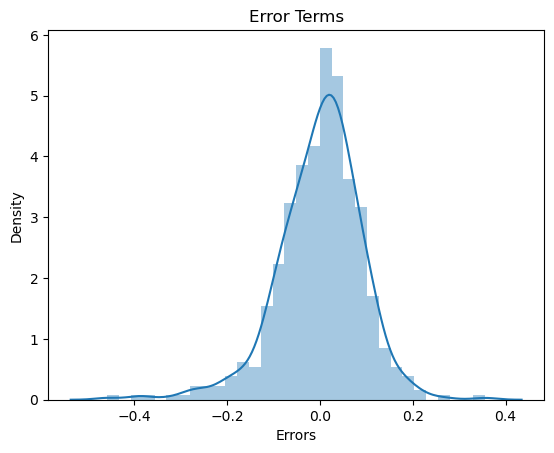

In [120]:
plot_res_dist(y_train, y_train_pred)

**Observation**
- Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

### Comparison of target values with predicted target values.

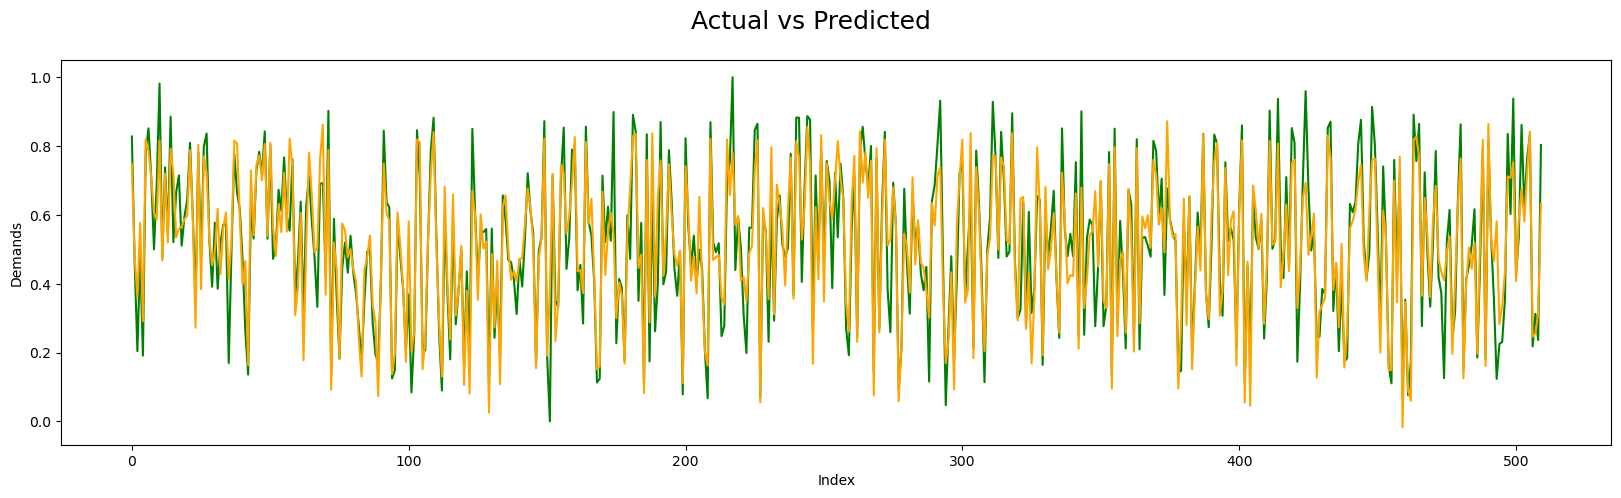

In [121]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.figure(figsize=(20,5))
plt.plot(c,y_train, color="green")
plt.plot(c,y_train_pred, color="orange")
plt.suptitle('Actual vs Predicted', fontsize = 18)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

# Step 7: Prediction and Model Evaluation

### R-Squared value for train predictions

In [122]:
#Print R-squared Value
round(r2_score(y_train,y_train_pred),4)

0.8335

## Prediction on test dataset

### Scaling test dataset

In [123]:
df_test.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,...,holiday_no holiday,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_workingday,weathersit_cloudy,weathersit_light_rain
184,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
535,32.082500,59.2083,7.625404,6211,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
299,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
221,31.433347,42.4167,13.417286,4780,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
152,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [124]:
# define variables to be scale.
var=['temp','hum','windspeed','cnt']

In [125]:
# Scaling the variables
df_test[var]=scaler.transform(df_test[var])

In [126]:
# checking after scaling
df_test.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,...,holiday_no holiday,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_workingday,weathersit_cloudy,weathersit_light_rain
184,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
535,0.901354,0.610133,0.153728,0.712034,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
299,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
221,0.881625,0.437098,0.339570,0.547400,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
152,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


### Dividing X_test and y_test

In [127]:
y_test=df_test.pop('cnt')
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
702    0.757478
127    0.495973
640    0.868615
72     0.232858
653    0.864243
Name: cnt, Length: 220, dtype: float64

In [128]:
X_test=df_test
X_test.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,...,holiday_no holiday,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_workingday,weathersit_cloudy,weathersit_light_rain
184,0.831783,0.657364,0.084219,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
535,0.901354,0.610133,0.153728,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
299,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
221,0.881625,0.437098,0.339570,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
152,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [130]:
# availaing only that variables which are selected by final model for test data
X_test_new = X_test[X_train_rfe.columns]
X_test_new.shape

(220, 12)

In [131]:
# Making predictions
y_test_pred = lr.predict(X_test_new)

In [132]:
# Find out the R squared value between test and predicted test data sets.

round(r2_score(y_test,y_test_pred),4)

0.8169

Text(0, 0.5, 'y_pred')

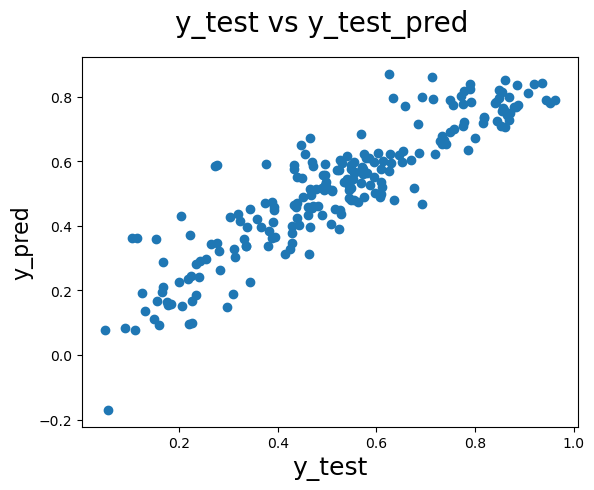

In [133]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# Step 8: Conclusion


**Observation**

 We got r squared value for
- `Train dataset` - 0.8335
- `Test dataset`- 0.8169

r sqaured value of test dataset is much closer to train dataset that means we have build a good model.

 Hence we can conclude that -
 
 **Significant variables to predict the demand for shared bikes are below.**

- temperature

- Windspeed

- year 2019

- Season 
    1. spring
    2. Winter
    
- Month
   1. July
   2. September
   3. December
   4. January
   5. November
   
- weathersit

  1. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  
  2. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds